# Ramachandran plot generator 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


import Bio.PDB as PDB  
from Bio.PDB import Vector, calc_dihedral 

In [4]:
# Parameters name and pdb file
name = "2ptc"
file = "2ptc.pdb"

# retrieve pdb file
#PDB.retrieve_pdb_file(name) # , obsolete=False, pdir=None, file_format=None, overwrite=False

#Load structure
p = PDB.PDBParser()
s = p.get_structure("2ptc", "2PTC.pdb") # optional name, pdbfile

/opt/miniconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2692.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 2815.
  warnings.warn(


In [30]:
def get_phi_psi(structure):
    """
    Calculate phi,psi dihedral angles and return lists.
    Uses the polypeptide class. A polypeptide is a normal (index zero-based)
    list of residues that are covalently bonded to the next and previous
    list element. No waters or ions.
    """
    # Create a list of  polypeptide objects
    ppb = PDB.PPBuilder()
    pp_list = ppb.build_peptides(structure)

    # Get phi and psi angles
    phi_list = []
    psi_list = []
    
    # Iterate over polypeptide molecules
    for pp in pp_list:
        # Calculate phi and psi angles and unpack list and tuple
        for phi, psi in pp.get_phi_psi_list():
            # put them in the lists
            if phi is not None:
                if psi is not None:
                    phi_list.append(phi)
                    psi_list.append(psi)

    return phi_list, psi_list

In [31]:
phi_list, psi_list = get_phi_psi(s)

In [32]:
print(type(phi_list[0]))
print(len(phi_list))
print(len(psi_list))

<class 'numpy.float64'>
277
277


In [33]:
def plot_rama(psi, phi):
    """Function that makes a ramachandran plot from lists of angles"""
    for i in range(len(phi)):
        plt.scatter(psi[i], phi[i])
    plt.xlabel('psi')
    plt.ylabel('phi')
    plt.title('Ramachandran plot')
    plt.axis('square')
    plt.show()

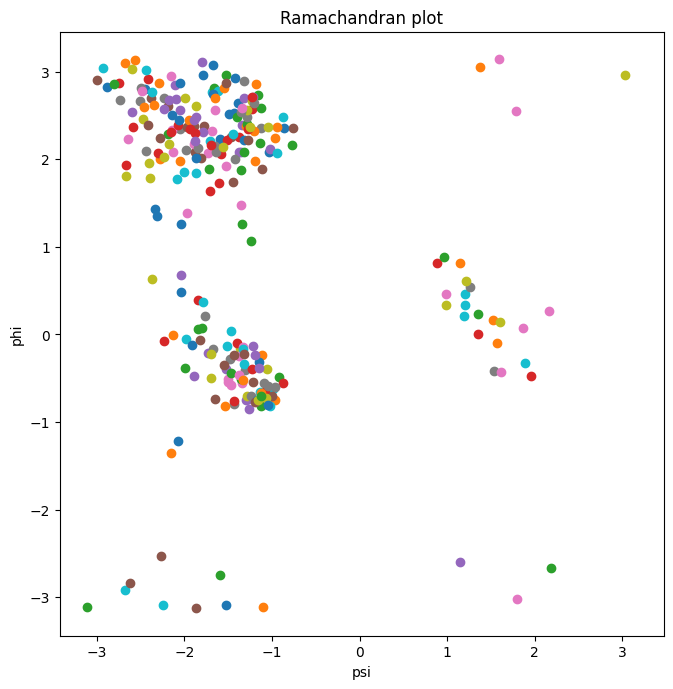

In [34]:
plot_rama(phi_list, psi_list)

In [8]:
##############################
# Second, own implementation #
##############################

def calc_phi_psi(res1, res2, res3):
    """Return the list of phi/psi dihedral angles."""
    n = res2['N'].get_vector()
    ca = res2['CA'].get_vector()
    c = res2['C'].get_vector()
    # Phi
    cp = res1['C'].get_vector()
    phi = calc_dihedral(cp, n, ca, c)
    # Psi
    nn = res3['N'].get_vector()
    psi = calc_dihedral(n, ca, c, nn)
    # Return phi, psi tuple
    return (phi, psi)

# Print (phi, psi) of residue 2
# Get all residues
r=list(s.get_residues())
print(calc_phi_psi(r[0], r[1], r[2]))

(-1.5875678985581017, 2.2279544386168295)


Structure exists: 'PDB/pdb1mbn.ent' 


             Ignored residues              
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Aminoacid ┃             φ-ψ             ┃
┃ residue   ┃           angles            ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ VAL1      │ (None, -0.9957294083533922) │
│ GLY153    │ (-0.9869091918795888, None) │
└───────────┴─────────────────────────────┘

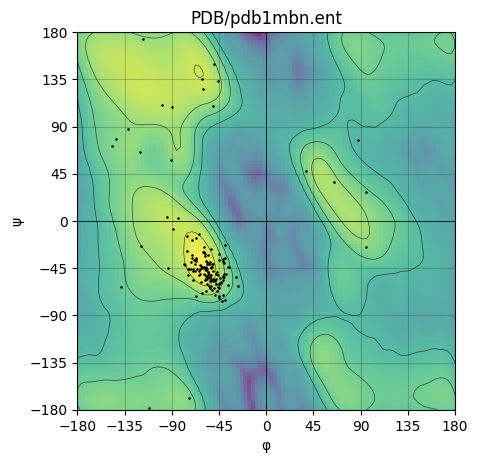

In [21]:
# Using rama dra 

from RamachanDraw import fetch, phi_psi, plot

# PDB id to be downloaded
PDB_id = '1MBN'

# Drawing the Ramachandran plot
plot(fetch(PDB_id))

# Generating a dictionary to store the phi and psi angles
# And returning the ignored aminoacid residues
phi_psi_dict, ignored_res = phi_psi(fetch(PDB_id), return_ignored=True)

/opt/miniconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2692.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 2815.
  warnings.warn(


Structure exists: 'PDB/pdb2ptc.ent' 


/opt/miniconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2692.
  warnings.warn(
/opt/miniconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 2815.
  warnings.warn(


             Ignored residues              
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Aminoacid ┃             φ-ψ             ┃
┃ residue   ┃           angles            ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ILE16     │  (None, 2.086358562797179)  │
│ ASN245    │ (-2.4396966957326383, None) │
│ ARG1      │ (None, -0.899906123177191)  │
│ ALA58     │ (-1.8575128357448778, None) │
└───────────┴─────────────────────────────┘

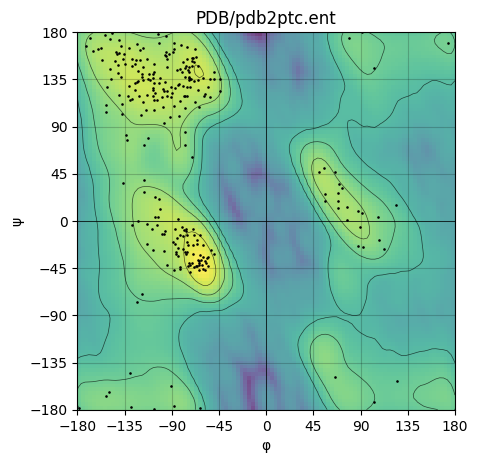

In [22]:
# PDB id to be downloaded
PDB_id_2ptc = '2PTC'

# Drawing the Ramachandran plot
plot(fetch(PDB_id_2ptc))

# Generating a dictionary to store the phi and psi angles
# And returning the ignored aminoacid residues
phi_psi_dict_2ptc, ignored_res_2pct = phi_psi(fetch(PDB_id_2ptc), return_ignored=True)